In [33]:
import numpy as np
from astropy import units as u
from astropy import constants as con
import os
from glob import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as pl
import seaborn as sns

mpl.style.use('seaborn-ticks')
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

import time as tm
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
%matplotlib inline

# To see if velocity can be distinguished by IRD CCF

In [34]:
M = 0.255 * con.M_sun
m = 10 * con.M_earth
P = 2.5 * u.day
a = 0.0229 * con.au

In [35]:
v1 = 2 * np.pi * a / P

In [37]:
v1.to(u.km/u.s)

<Quantity 99.65222768 km / s>

In [38]:
v2 = (con.G * M / a)**0.5
v2.to(u.km/u.s)

<Quantity 99.3906338 km / s>

remove semimajor axis, from Kepler's law

In [39]:
a2 = ((con.G * (M+m) ) / (4*np.pi**2)* P**2)**(1/3.)
a2.to(u.au)

<Quantity 0.0228608 AU>

In [40]:
v_calc =  2 * np.pi * ((con.G * (M+m) ) / (4*np.pi**2)* P**2)**(1/3.) / P
v_calc.to(u.km/u.s)

<Quantity 99.48166084 km / s>

In [41]:
def v_from_m(m, P=2.5, M=0.255):
    P = P * u.day
    M = M * con.M_sun
    m = m * con.M_sun
    v_calc =  2 * np.pi * ((con.G * (M+m) ) / (4*np.pi**2)* P**2)**(1/3.) / P
    return v_calc.to(u.km/u.s).value

In [42]:
v_from_m([0])

array([99.47775537])

In [43]:
def v_from_m2(m, P=2.5, M=0.255):
    P = P * u.day
    M = M * con.M_sun
    m = m * con.M_earth
    v_calc =  ((2 * np.pi * con.G * (M+m)) / P)**(1/3.)
    return v_calc.to(u.km/u.s).value

In [44]:
v_from_m2(8)

99.48087977093284

# See the rotational signal 

In [45]:
from lightkurve import search_targetpixelfile
import lightkurve as lk

In [46]:
pixelfile = search_targetpixelfile("TIC 470381900").download_all();

In [47]:
pixelfile

TargetPixelFileCollection of 2 objects:
    0: TessTargetPixelFile(TICID: 470381900)
    1: TessTargetPixelFile(TICID: 470381900)

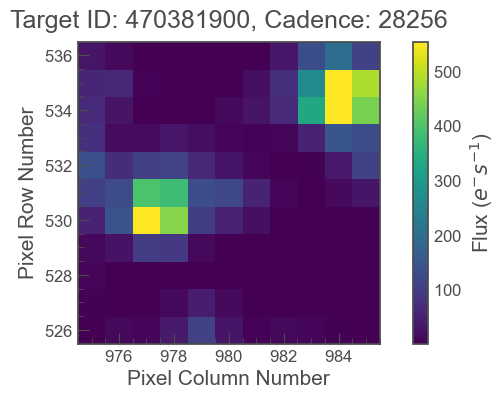

In [48]:
pixelfile[1].plot(frame=1);

In [49]:
search_result = lk.search_lightcurve('TIC 470381900')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 19,2019,SPOC,120,470381900,0.0
1,TESS Sector 19,2019,TESS-SPOC,1800,470381900,0.0


In [50]:
lc=search_result[0].download()
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1816.0894844491315,3.2976566e+02,8.0553446e+00,5.0844196e-03,423813,979.81241,530.94684,3.8993088e+02,5.0452027e+00,8.1162207e+02,2.0804517e+00,3.2976566e+02,8.0553446e+00,0,nan,nan,nan,nan,979.81241,7.8657670e-03,530.94684,7.2796526e-03,-1.5460318e-02,-9.1429457e-02
1816.0908733579258,3.4020300e+02,8.0789852e+00,5.0844401e-03,423814,979.80181,530.95072,3.9633682e+02,5.0600095e+00,8.1343298e+02,2.0793962e+00,3.4020300e+02,8.0789852e+00,0,nan,nan,nan,nan,979.80181,7.7854563e-03,530.95072,7.1820850e-03,-1.3608390e-02,-9.3447886e-02
1816.0922622662545,3.4258325e+02,8.0675354e+00,5.0844601e-03,423815,979.80282,530.95994,3.9684729e+02,5.0528383e+00,8.1034875e+02,2.0821700e+00,3.4258325e+02,8.0675354e+00,0,nan,nan,nan,nan,979.80282,7.7593694e-03,530.95994,7.1660131e-03,-1.5685625e-02,-9.1940939e-02
1816.0936511745847,3.3287387e+02,8.0791931e+00,5.0844802e-03,423816,979.80890,530.95656,3.9198984e+02,5.0601401e+00,8.1339124e+02,2.0896373e+00,3.3287387e+02,8.0791931e+00,0,nan,nan,nan,nan,979.80890,7.8725033e-03,530.95656,7.2336299e-03,-1.5181838e-02,-8.8854551e-02
1816.0950400829147,3.3797128e+02,8.0684776e+00,5.0845002e-03,423817,979.79870,530.94761,3.9447083e+02,5.0534282e+00,8.1082416e+02,2.0847504e+00,3.3797128e+02,8.0684776e+00,0,nan,nan,nan,nan,979.79870,7.8468369e-03,530.94761,7.1764588e-03,-1.4843603e-02,-9.6783496e-02
1816.096428991709,3.4411374e+02,8.0641479e+00,5.0845207e-03,423818,979.80971,530.95397,3.9857169e+02,5.0507169e+00,8.1173621e+02,2.0866539e+00,3.4411374e+02,8.0641479e+00,0,nan,nan,nan,nan,979.80971,7.7246865e-03,530.95397,7.1190079e-03,-1.6861891e-02,-8.9034691e-02
1816.0978179000379,3.3489990e+02,8.0507851e+00,5.0845407e-03,423819,979.81485,530.95016,3.9200262e+02,5.0423470e+00,8.0938062e+02,2.0821805e+00,3.3489990e+02,8.0507851e+00,0,nan,nan,nan,nan,979.81485,7.8058736e-03,530.95016,7.2399792e-03,-1.9772973e-02,-9.1296703e-02
1816.0992068083679,3.3583978e+02,8.0627489e+00,5.0845607e-03,423820,979.80953,530.95022,3.9360178e+02,5.0498409e+00,8.1007471e+02,2.0770755e+00,3.3583978e+02,8.0627489e+00,0,nan,nan,nan,nan,979.80953,7.8234309e-03,530.95022,7.2131758e-03,-1.1628862e-02,-9.1135986e-02


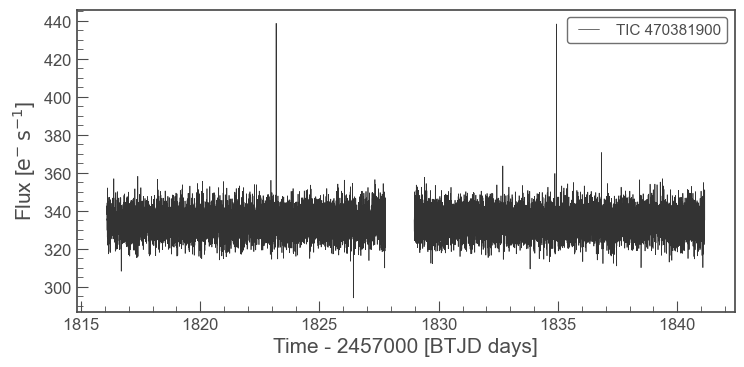

In [51]:
lc.plot();

magnitudeに変換

In [52]:
def f_to_mag(f, f_e):
    m = -2.5 * np.log10(f)
    m_err = abs(-2.5 * f_e / (f *np.log(10)))
    return m, m_err

In [53]:
m_TESS, m_err_TESS = f_to_mag(lc.flux.value, lc.flux_err.value)
time_TESS = lc.time.jd

<ErrorbarContainer object of 3 artists>

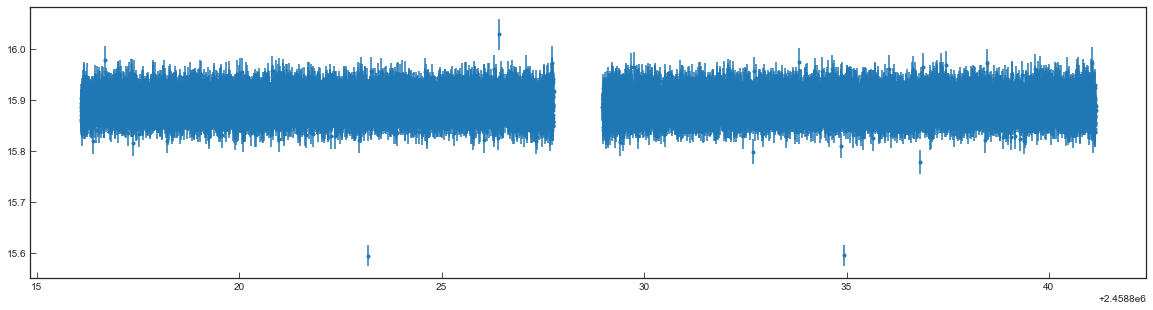

In [54]:
pl.figure(figsize=(20,5))
pl.errorbar(time_TESS, m_TESS+22.2, m_err_TESS, fmt='.')

In [55]:
from PyAstronomy.pyTiming import pyPeriod

In [59]:
clp = pyPeriod.Gls((time_TESS,m_TESS,m_err_TESS), norm="ZK", Pbeg=1, Pend=30)

No output of frequency error.
Increase frequency range to sample the peak maximum.


In [60]:
clp.info()

Generalized LS - statistical output
-----------------------------------
Number of input points:      17065 
Weighted mean of dataset:    nan
Weighted rms of dataset:     nan
Time base:                   25.063606
Number of frequency points:  243   

Maximum power p [ZK]:  nan
RMS of residuals:      nan
  Mean weighted internal error:  nan
Best sine frequency:   0.033333 +/-  nan
Best sine period:      30.000000 +/-  nan
Amplitude:             nan +/-  nan
Phase (ph):            nan +/-  nan
Phase (T0):            nan +/-  nan
Offset:                nan +/-  nan
-----------------------------------


No output of frequency error.
Increase frequency range to sample the peak maximum.


Text(31.0, nan, 'P=30.00days\nFAP=nan')

posx and posy should be finite values
posx and posy should be finite values


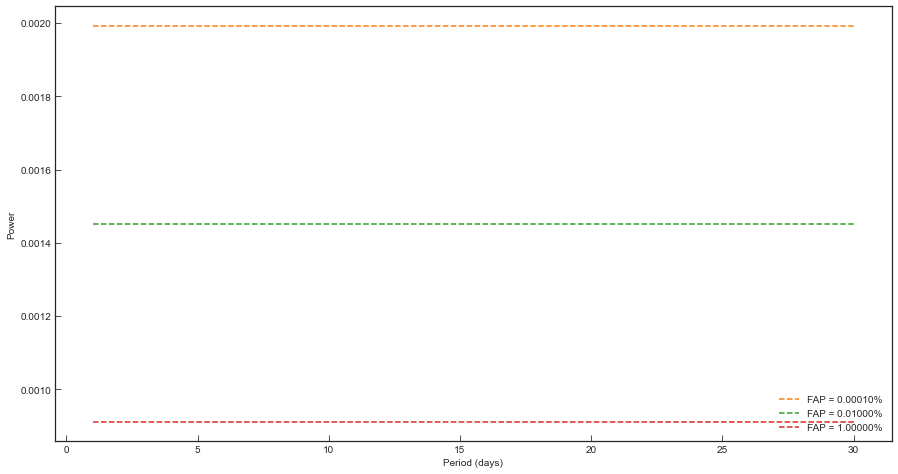

In [58]:


ifmax = np.argmax(clp.power)
pmax = clp.power[ifmax]
fmax = clp.freq[ifmax]
hpp = 1./fmax

# Define FAP levels of 10%, 5%, and 1%
fapLevels = np.array([1.0e-6, 1.0e-4, 0.01 ])
# Obtain the associated power thresholds
plevels = clp.powerLevel(fapLevels)

f = pl.figure(figsize=(15,8))

pl.xlabel("Period (days)")
pl.ylabel("Power")
pl.plot(1/clp.freq, clp.power, '-')

for i in range(len(fapLevels)):
    pl.plot([min(1/clp.freq), max(1/clp.freq)], [plevels[i]]*2, '--',
             label="FAP = %4.5f%%" % (fapLevels[i]*100))
pl.legend(loc='lower right')

pl.plot(hpp, pmax, '.', color='r')
pl.text(hpp+1, pmax-0.005, 'P={:.2f}days\nFAP={:e}'.format(1/fmax, clp.FAP(pmax)))

#pl.savefig('XXX.pdf', facecolor='w')

トランジット周囲を除く